In [14]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import joblib
import numpy as np

Generated Temperature Data:
[[<Axes: title={'center': 'temperature'}>]]


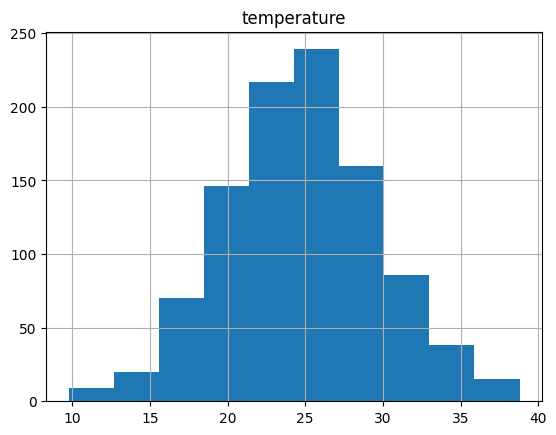

In [26]:
#@title Generate Database

# Generate synthetic temperature data
np.random.seed(0)  # For reproducibility

# Define parameters
num_samples = 1000
mean_temperature = 25  # Mean temperature
std_dev_temperature = 5  # Standard deviation of temperature

# Generate random temperatures around the mean
temperatures = np.random.normal(loc=mean_temperature, scale=std_dev_temperature, size=num_samples)

# Create a DataFrame to store the temperature data
temperature_data = pd.DataFrame({'temperature': temperatures})


# Display the first few rows of the generated data
print("Generated Temperature Data:")
print(temperature_data.hist())


In [27]:
#@title Generate Model

# Assuming the temperature data is in a column named 'temperature'
X = temperature_data[['temperature']]

# Train Isolation Forest model
model = IsolationForest(contamination=5/100)
model.fit(X)

# Save the trained model as a .pkl file
joblib.dump(model, 'anomaly.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


['anomaly.pkl']

In [33]:
# Predict anomalies (1 for normal, -1 for anomalies)
anomaly_labels = model.predict(X)
temperature_data['anomaly_label'] = anomaly_labels
print(temperature_data)

     temperature  anomaly_label
0      33.820262              1
1      27.000786              1
2      29.893690              1
3      36.204466             -1
4      34.337790              1
..           ...            ...
995    27.064354              1
996    24.008006              1
997    25.470962              1
998    19.261945              1
999    23.209430              1

[1000 rows x 2 columns]
